<a href="https://colab.research.google.com/github/Ibrahima-Ndao/AnalytiqueArrayHash/blob/main/TP_ST_BTC_USD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [146]:
# prompt: Enlever les warning

import warnings
warnings.filterwarnings('ignore')


In [147]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA

# Charger et examiner les données

In [148]:
start_date = "2015-01-01"
end_date = "2024-12-23"

df = yf.download('BTC-USD', start=start_date, end=end_date)

[*********************100%***********************]  1 of 1 completed


In [149]:
df.head()

Price,Adj Close,Close,High,Low,Open,Volume
Ticker,BTC-USD,BTC-USD,BTC-USD,BTC-USD,BTC-USD,BTC-USD
Date,,,,,,
2015-01-01,314.248993,314.248993,320.434998,314.002991,320.434998,8036550
2015-01-02,315.032013,315.032013,315.838989,313.565002,314.079010,7860650
2015-01-03,281.082001,281.082001,315.149994,281.082001,314.846008,33054400
2015-01-04,264.195007,264.195007,287.230011,257.612000,281.145996,55629100
2015-01-05,274.473999,274.473999,278.341003,265.084015,265.084015,43962800


### Création d'un nouveau dataset avec la variable `Close` qui est la variable observé dans notre série temporelle.

In [150]:
df = df['Close']

In [151]:
df.head()

Ticker,BTC-USD
Date,
2015-01-01,314.248993
2015-01-02,315.032013
2015-01-03,281.082001
2015-01-04,264.195007
2015-01-05,274.473999


### Renommons les colonnes de notre Série temporelle.

In [152]:
df.rename(columns={'Date':'Date', 'BTC-USD': 'close'}, inplace=True)

# l'objectif de notre travail consiste a mettre en place un modèle de prédiction du prix de cloture de BTC-USD en fonction du temps. Donc nous avons affaire a une série temporelle univariée.
- Analyse descriptive de notre variable observée ['close']

In [153]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3644 entries, 2015-01-01 to 2024-12-22
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   close   3644 non-null   float64
dtypes: float64(1)
memory usage: 56.9 KB


In [154]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Ticker,,,,,,,,
close,3644.0,19958.095792,21908.606604,178.102997,2573.927551,9654.239746,31783.625488,106140.601562


### Voir les valeurs manquantes.

In [155]:
df.isnull().sum()

,0
Ticker,
close,0


- Il n'existe pas de valeur manquante dans notre série temporelle

## Voir la distribution des données observées

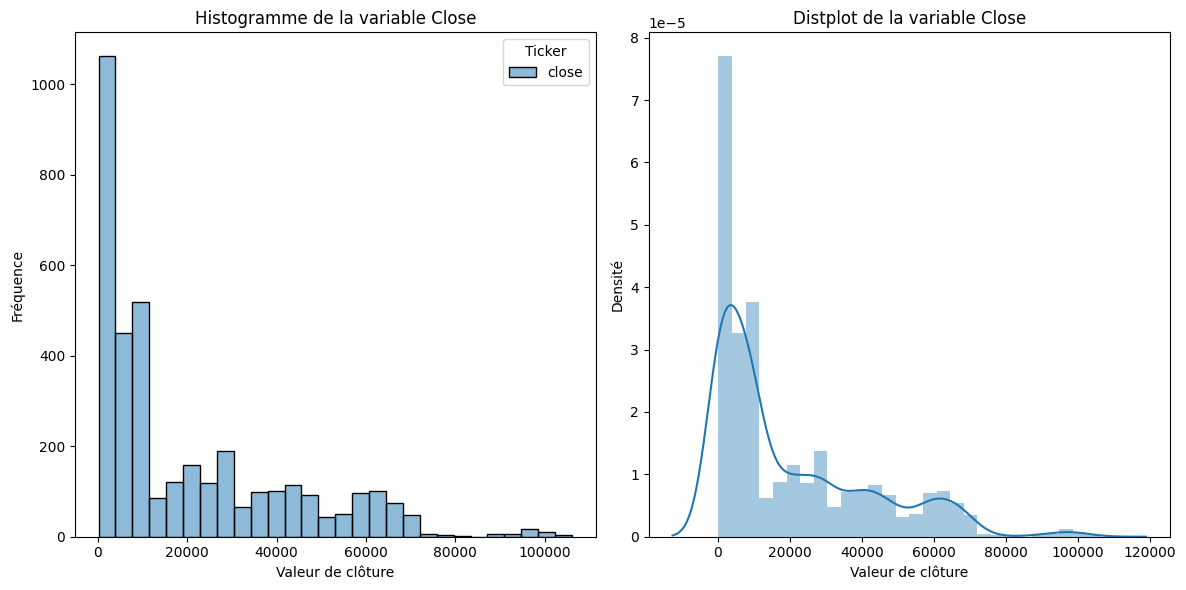

In [156]:
# prompt: fais un histogramme et un distplot bien aligné pour notre variable close

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.histplot(df)
plt.title('Histogramme de la variable Close')
plt.xlabel('Valeur de clôture')
plt.ylabel('Fréquence')


plt.subplot(1, 2, 2)
sns.distplot(df)
plt.title('Distplot de la variable Close')
plt.xlabel('Valeur de clôture')
plt.ylabel('Densité')

plt.tight_layout()
plt.show()

- La représentation graphique de l'histogramme et du displot des données observées de la variable Close montre que ces données ne sont pas normalement distribuées, c'est-à-dire qu'elles ne suivent pas une loi normale.

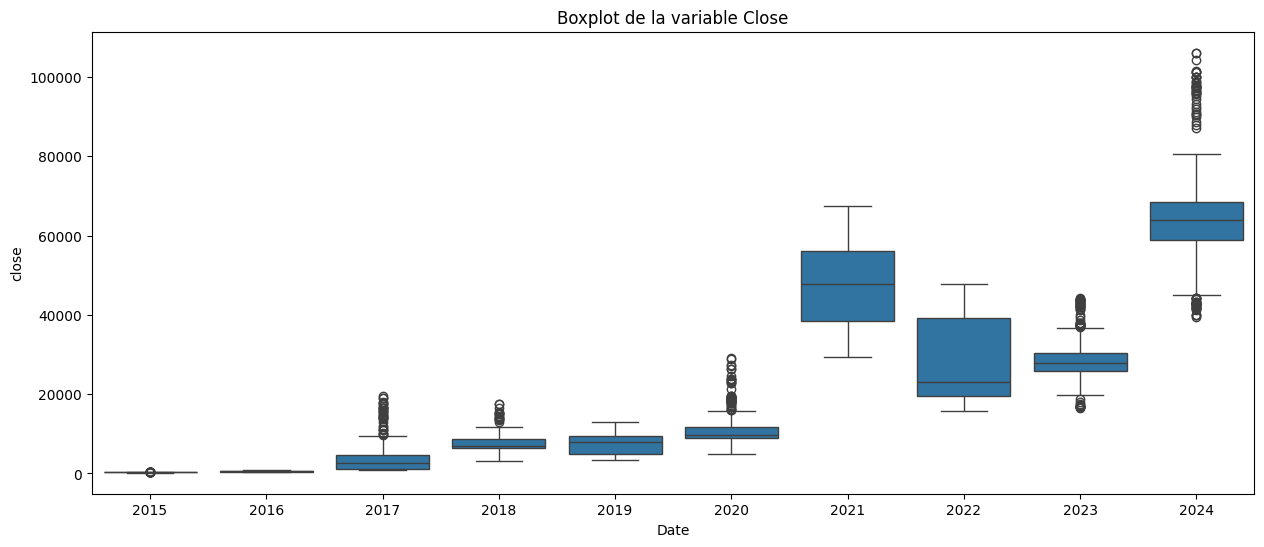

In [157]:
fig, ax = plt.subplots(figsize=(15, 6))
sns.boxplot(x=df.index.year, y=df['close'], ax=ax)
ax.set_title('Boxplot de la variable Close')
plt.show()

L’analyse des boxplots de la variable Close du BTC-USD révèle plusieurs observations importantes sur l’évolution des prix de clôture du Bitcoin au fil des années :

Tout d’abord, on note une tendance générale à la hausse des prix de clôture, particulièrement marquée à partir de l’année 2020. Les années précédentes (2015-2019) présentent des niveaux de prix nettement plus bas, reflétant une période où le Bitcoin était moins largement adopté et moins valorisé.

La volatilité des prix, représentée par l’amplitude des boîtes et des moustaches, est faible jusqu’en 2019, mais augmente significativement à partir de 2020. Cette augmentation de volatilité témoigne d’une variation beaucoup plus importante des prix, probablement en raison d’une plus grande spéculation sur le marché.

Les outliers, visibles sous forme de points situés au-dessus des moustaches, sont particulièrement nombreux en 2017, 2020 et 2024. Ces années correspondent à des moments où le prix du Bitcoin a atteint des sommets historiques, notamment lors des vagues de popularité croissantes ou des bulles spéculatives.

Certaines années clés se distinguent :

- 2017 : Une première hausse notable avec une plus grande amplitude des prix, reflétant la première grande vague d’adoption et de spéculation autour du Bitcoin.
- 2020-2021 : Une forte augmentation des prix est visible, marquant une phase d’expansion importante pour le Bitcoin. Les prix moyens ont fortement augmenté, avec une dispersion des valeurs reflétant une volatilité accrue.
- 2022 : Une stabilisation ou une légère baisse est visible après le pic de 2021, probablement en raison d’une correction du marché ou d’événements externes.
- 2023-2024 : Les prix se maintiennent à des niveaux élevés, avec une dispersion notable en 2024 qui indique encore une forte volatilité.
Enfin, la distribution asymétrique des prix pour chaque année montre que les données ne suivent pas une distribution normale. Cela est cohérent avec le comportement souvent imprévisible et spéculatif des marchés de cryptomonnaies.

En conclusion, cette analyse met en évidence l’évolution marquée des prix du Bitcoin, caractérisée par des périodes de forte volatilité et des pics importants de valorisation. Ces résultats soulignent la nature dynamique et spéculative du marché des cryptomonnaies, influencé par de nombreux facteurs économiques, technologiques et sociaux.

# Visualisation de notre série temporelle. Voire l'évolution de la variable close en fonction des dates.

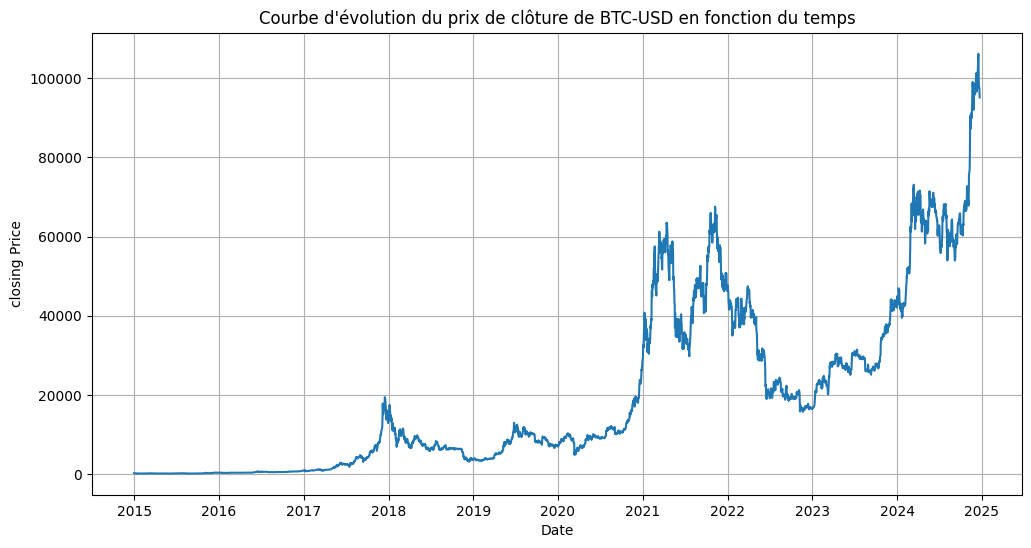

In [158]:
# prompt: Trace moi le courbe d'évolution

# Plot the closing price of BTC-USD
plt.figure(figsize=(12, 6))
plt.plot(df)
plt.title('Courbe d\'évolution du prix de clôture de BTC-USD en fonction du temps')
plt.xlabel('Date')
plt.ylabel('closing Price')
plt.grid(True)
plt.show()

### La courbe montre que nous avons une tendance positive. Cela veut dire que la tendance est haussière et une saisonnalité qui est croissante en fonction du temps. Il semble que la série temporelle n'est pas stationnaire.

---
# Faire une décomposition additive et multiplicative pour avoir une connaissance sur notre modèle.

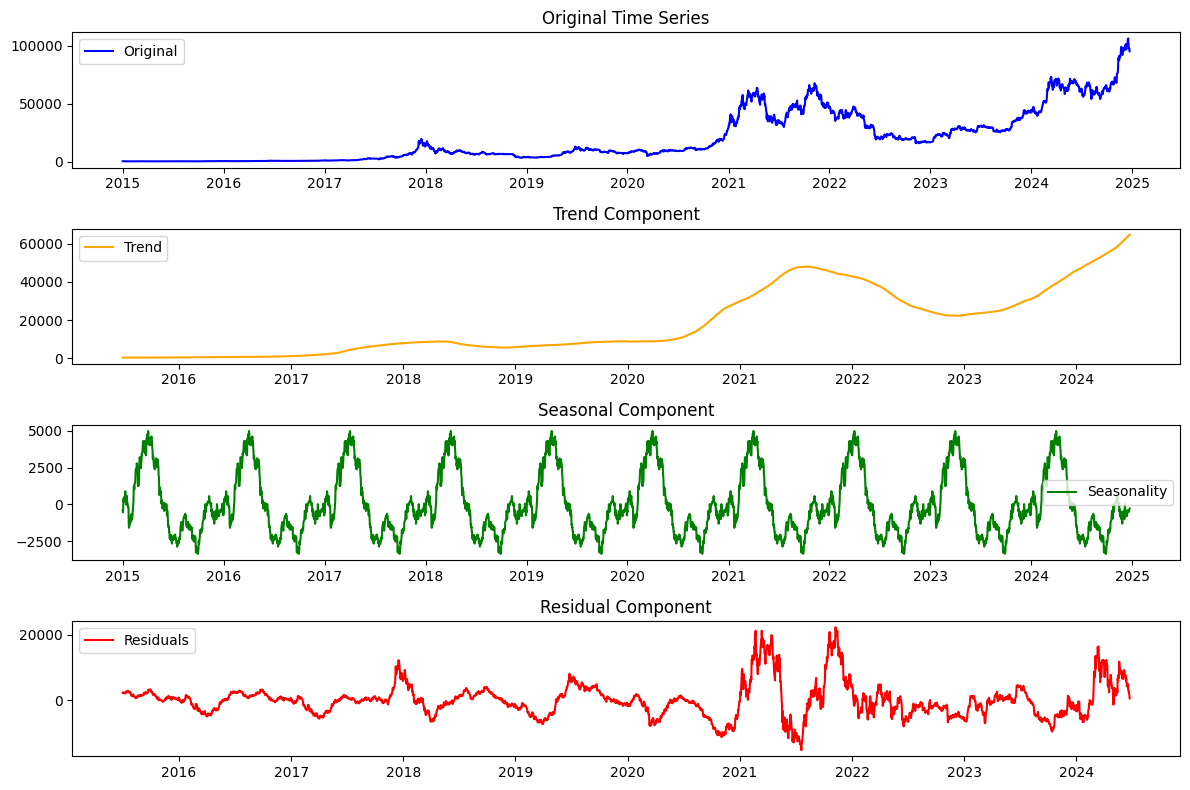

In [159]:
decomposition = seasonal_decompose(df, model='additive', period=365) # Adjust period as needed

# Store components in variables
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

# Plot the decomposed components
plt.figure(figsize=(12, 8))

plt.subplot(411)
plt.plot(df, label='Original', color='blue')
plt.legend(loc='best')
plt.title('Original Time Series')

plt.subplot(412)
plt.plot(trend, label='Trend', color='orange')
plt.legend(loc='best')
plt.title('Trend Component')

plt.subplot(413)
plt.plot(seasonal, label='Seasonality', color='green')
plt.legend(loc='best')
plt.title('Seasonal Component')

plt.subplot(414)
plt.plot(residual, label='Residuals', color='red')
plt.legend(loc='best')
plt.title('Residual Component')

plt.tight_layout()
plt.show()

- Pour la décomposition additive, on constate une saisonnalité constante de 2015 à 2025, mais une forte variation des bruits, allant de 0 à 20 000, avec une amplitude de la courbe de variation du bruit qui augmente au fil du temps. Cela signifie qu'avec la décomposition additive, il y a beaucoup de bruit, et que les données observées ne suivent pas un schéma additif.

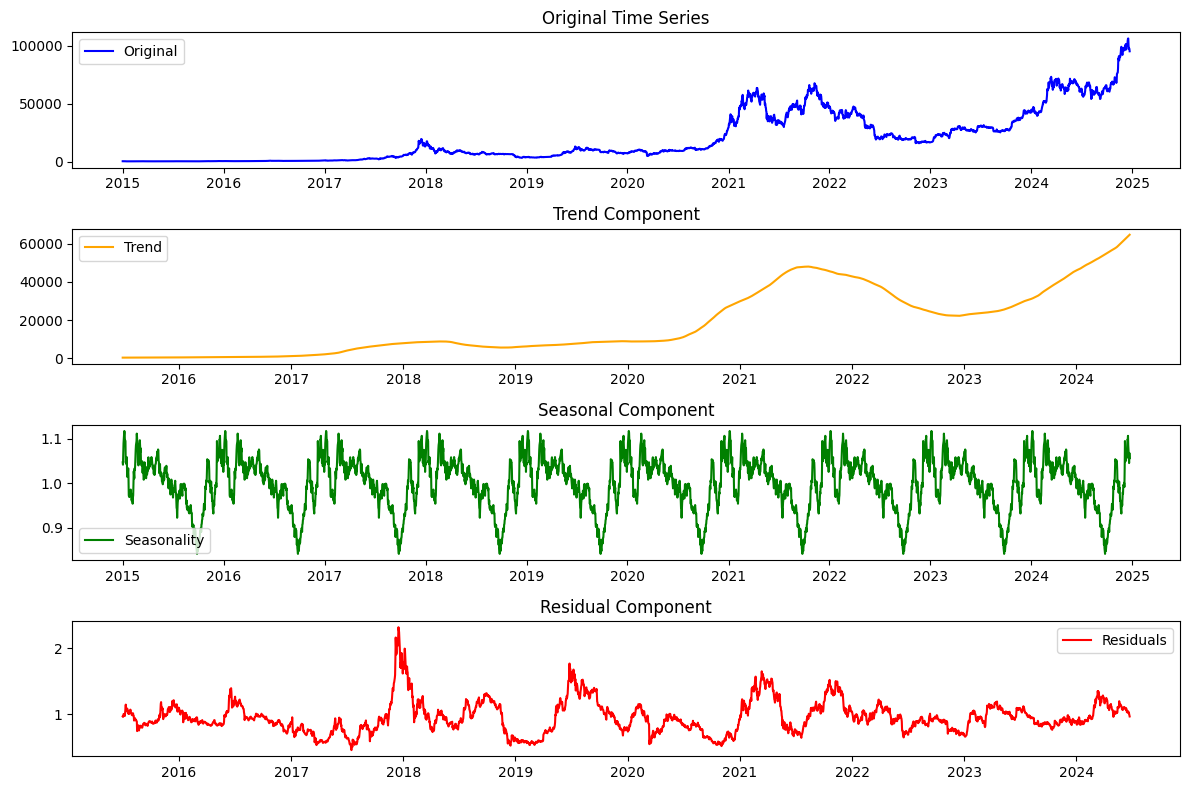

In [160]:
decomposition = seasonal_decompose(df, model='multiplicative', period=365) # Use multiplicative model

# Store components in variables
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

# Plot the decomposed components
plt.figure(figsize=(12, 8))

plt.subplot(411)
plt.plot(df, label='Original', color='blue')
plt.legend(loc='best')
plt.title('Original Time Series')

plt.subplot(412)
plt.plot(trend, label='Trend', color='orange')
plt.legend(loc='best')
plt.title('Trend Component')

plt.subplot(413)
plt.plot(seasonal, label='Seasonality', color='green')
plt.legend(loc='best')
plt.title('Seasonal Component')

plt.subplot(414)
plt.plot(residual, label='Residuals', color='red')
plt.legend(loc='best')
plt.title('Residual Component')

plt.tight_layout()
plt.show()

- Pour la décomposition multiplicative, on constate une saisonnalité constante et plus condensée de 2015 à 2025, accompagnée d'une faible variation des bruits, allant de 1 à 2, avec une amplitude de la courbe de variation du bruit qui diminue au fil du temps. Cela signifie qu'avec la décomposition multiplicative, le bruit est réduit, et que les données observées suivent un schéma multiplicatif, où la tendance et la saisonnalité se multiplient par rapport aux composants du bruit.
Dans ce cas, si la saisonnalité est constante et la variation du bruit est faible, cela suggère que le modèle multiplicatif est adapté. La faible amplitude des bruits indique que l'influence des erreurs est relativement faible et que la tendance et la saisonnalité influencent principalement la série temporelle, en suivant un schéma multiplicatif.

### Convertir les Données Multiplicatives en Additives
- Les séries temporelles peuvent avoir des effets multiplicatifs entre leurs composantes (par exemple, une tendance exponentielle).
- En appliquant un logarithme, on transforme ces relations multiplicatives en relations additives, facilitant ainsi des analyses comme la décomposition additive ou les modèles linéaires.

In [161]:
df_log = np.log(df)

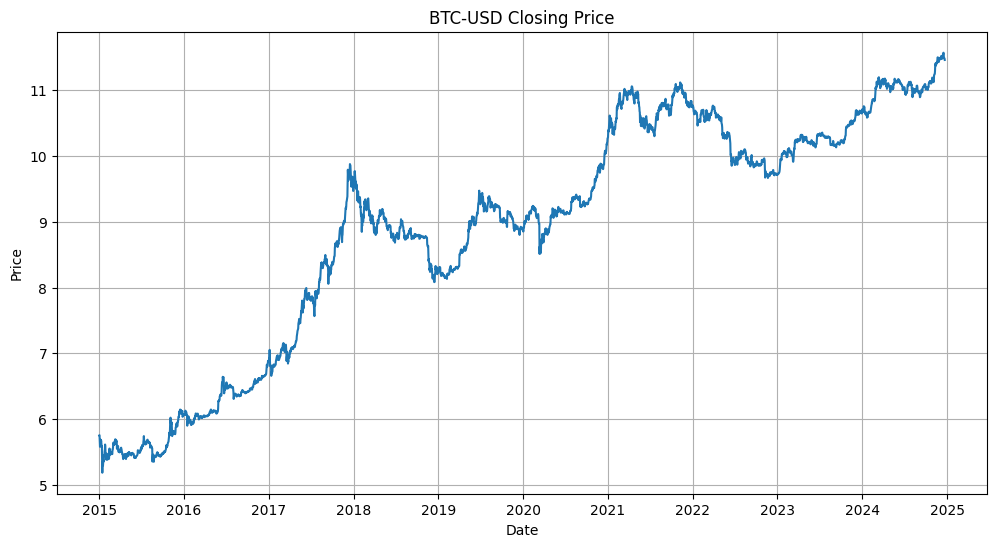

In [162]:
plt.figure(figsize=(12, 6))
plt.plot(df_log)
plt.title('BTC-USD Closing Price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.grid(True)
plt.show()

### La courbe montre une réduction des amplitudes de variation au fil du temps, et la variance semble être stabilisée.
- Les séries temporelles financières, comme les prix des actions ou des cryptomonnaies, montrent souvent une variabilité accrue à mesure que les valeurs augmentent.
- En appliquant le logarithme, les grandes variations relatives (en pourcentage) sont "compressées", rendant la série plus homogène et plus facile à analyser.
- Une propriété essentielle pour de nombreux modèles de séries temporelles est que la variance (ou la fluctuation) soit constante au fil du temps.
- La transformation logarithmique aide à stabiliser la variance dans les cas où les amplitudes des variations augmentent avec les niveaux de la série.
- De nombreux algorithmes de modélisation statistique ou machine learning, comme l'ARIMA ou les régressions linéaires, supposent que les données sont linéaires ou qu'elles ont des fluctuations relativement constantes.
- Le logarithme améliore l'ajustement de ces modèles en réduisant les effets des valeurs extrêmes (outliers) et des écarts de distribution.

---
# La décomposition des données converties (après transformation logarithmique)

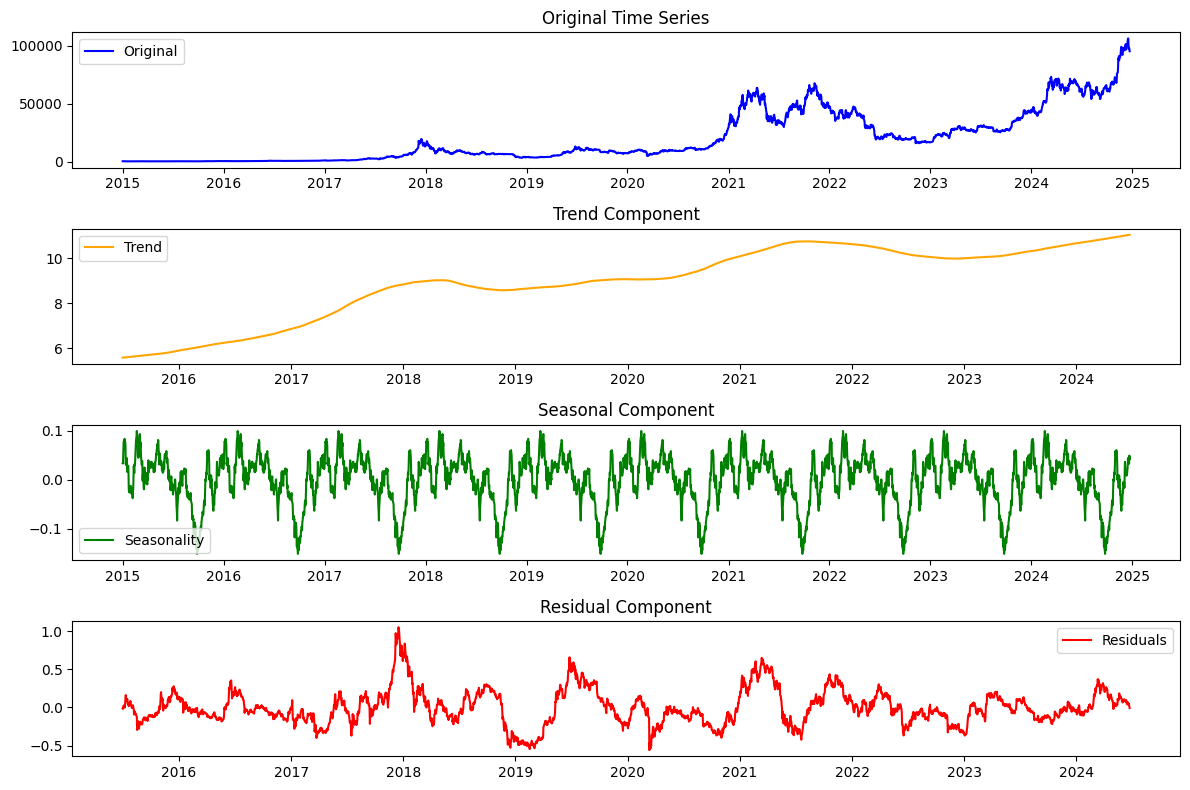

In [163]:
decomposition = seasonal_decompose(df_log, period=365) # Adjust period as needed

# Store components in variables
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

# Plot the decomposed components
plt.figure(figsize=(12, 8))

plt.subplot(411)
plt.plot(df, label='Original', color='blue')
plt.legend(loc='best')
plt.title('Original Time Series')

plt.subplot(412)
plt.plot(trend, label='Trend', color='orange')
plt.legend(loc='best')
plt.title('Trend Component')

plt.subplot(413)
plt.plot(seasonal, label='Seasonality', color='green')
plt.legend(loc='best')
plt.title('Seasonal Component')

plt.subplot(414)
plt.plot(residual, label='Residuals', color='red')
plt.legend(loc='best')
plt.title('Residual Component')

plt.tight_layout()
plt.show()

Une fois les données transformées et décomposées, chaque composante est ajustée en tenant compte des effets de la transformation :
- Tendance : La tendance observée est mieux lissée grâce à la réduction des amplitudes de variation.
- Saisonnalité : Les variations cycliques deviennent plus homogènes et proportionnelles.
- Résidus : Les erreurs ou variations inexpliquées sont mieux réparties, moins dominées par des valeurs extrêmes, et les variations du bruit deviennent plus faibles et diminuent au fil du temps.








---
# Vérifier si la série temporelle est stationnaire avec Le test de Dickey-Fuller augmenté (ADF).

In [164]:
from statsmodels.tsa.stattools import adfuller

# Perform the Augmented Dickey-Fuller test
result = adfuller(df_log)

# Print the test results
print('Test statistique ADF :', result[0])
print('Valeur p :', result[1])
print('Nombre de retards utilisés :', result[2])
print('Nombre d observations utilisées :', result[3])
print('Valeurs critiques :')
for key, value in result[4].items():
    print('\t%s : %.3f' % (key, value))

# Interprétation des résultats
if result[1] < 0.05:
    print("La série est stationnaire (on rejette H0).")
else:
    print("La série n'est pas stationnaire (on accepte H0).")

Test statistique ADF : -1.0369482251902618
Valeur p : 0.7395509563375555
Nombre de retards utilisés : 1
Nombre d observations utilisées : 3642
Valeurs critiques :
	1% : -3.432
	5% : -2.862
	10% : -2.567
La série n'est pas stationnaire (on accepte H0).


---
# Application de la différenciation pour rendre notre serie temporelle stationnaire.

In [165]:
# Differencing
df_diff = df_log.diff().dropna()


---
# Application du test de Dickey-Fuller augmenté (ADF) après différenciation.

In [166]:
# Perform the Augmented Dickey-Fuller test on the differenced series
result_diff = adfuller(df_diff)

# Print the test results for the differenced series
print('\nTest statistique ADF (après différenciation) :', result_diff[0])
print('Valeur p (après différenciation) :', result_diff[1])
print('Nombre de retards utilisés (après différenciation):', result_diff[2])
print('Nombre d observations utilisées (après différenciation):', result_diff[3])
print('Valeurs critiques (après différenciation) :')
for key, value in result_diff[4].items():
    print('\t%s : %.3f' % (key, value))

# Interprétation des résultats après différenciation
if result_diff[1] <= 0.05:
    print("\nLa valeur p est inférieure à 0.05. On rejette l'hypothèse nulle.")
    print("La série temporelle différenciée est stationnaire.")
else:
    print("\nLa valeur p est supérieure à 0.05. On ne rejette pas l'hypothèse nulle.")
    print("La série temporelle différenciée n'est pas stationnaire.")




Test statistique ADF (après différenciation) : -61.78243320415075
Valeur p (après différenciation) : 0.0
Nombre de retards utilisés (après différenciation): 0
Nombre d observations utilisées (après différenciation): 3642
Valeurs critiques (après différenciation) :
	1% : -3.432
	5% : -2.862
	10% : -2.567

La valeur p est inférieure à 0.05. On rejette l'hypothèse nulle.
La série temporelle différenciée est stationnaire.


### Donc notre série devient stationnaire après une différenciation d'ordre 1
 - 👉 d = 1

---

# Visualisation de notre série stationnaire, ACF et PACF

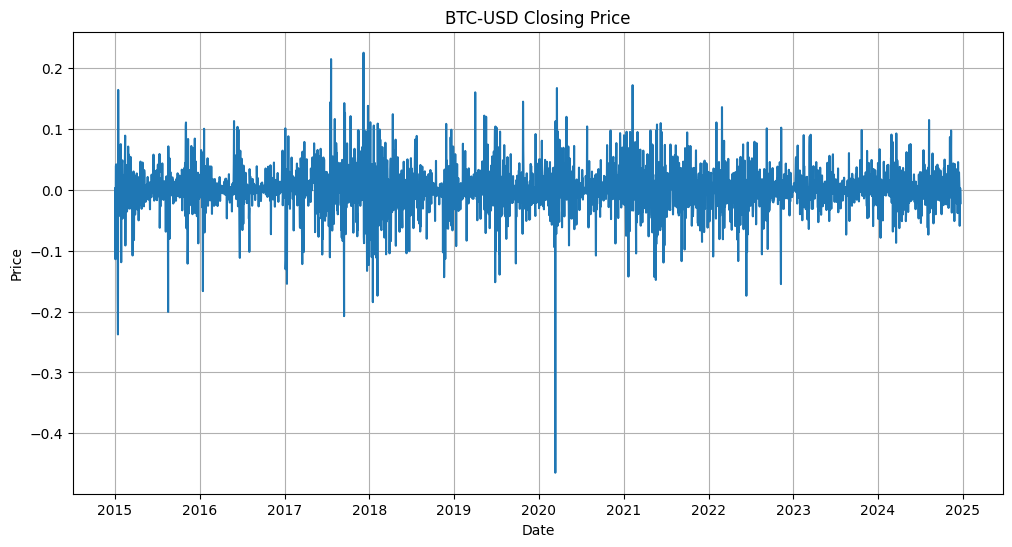

In [167]:
plt.figure(figsize=(12, 6))
plt.plot(df_diff)
plt.title('BTC-USD Closing Price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.grid(True)
plt.show()

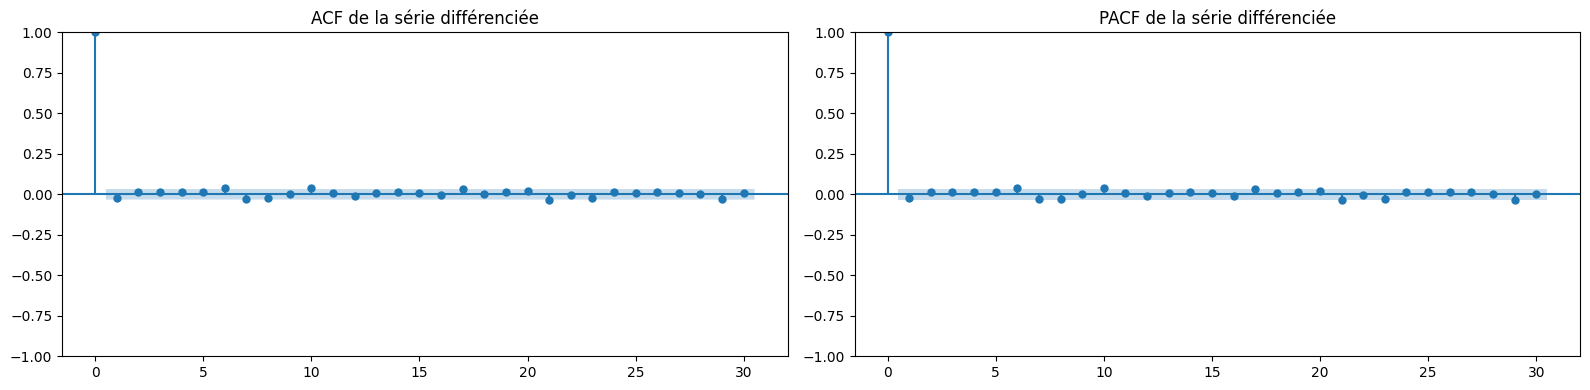

In [168]:
# prompt: fais moi ACF et PACF bien aligné

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

#ACF et PACF pour la série différenciée
fig, axes = plt.subplots(1, 2, figsize=(16,4))

plot_acf(df_diff, lags=30, ax=axes[0])
axes[0].set_title('ACF de la série différenciée')

plot_pacf(df_diff, lags=30, ax=axes[1])
axes[1].set_title('PACF de la série différenciée')

plt.tight_layout()
plt.show()

1. Interprétation de l'ACF :
- L'ACF montre une forte valeur au lag 0 (normal).
- Pour les lags suivants, les valeurs oscillent autour de zéro et restent dans les bandes de confiance (aucune autocorrélation significative).
  - 👉 𝑞 = 0
2. Interprétation de la PACF :
- Le PACF suit une dynamique similaire avec une coupure nette après le lag 0.
- Les valeurs des lags suivants sont faibles et non significatives.
  - 👉 𝑝 = 0
3. ACF : La décroissance rapide vers zéro sans autocorrélation significative suggère une composante MA faible (ou absente).
4. PACF : La coupure rapide après le lag 0 indique qu'il n'y a pas de structure autoregressive forte.


## Diviser les données en ensemble d'entraînement et de test

In [213]:
train_data = df_log['close'][:-365]
test_data = df_log['close'][-365:]
train_data.shape[0] + test_data.shape[0] == df['close'].shape[0]

True

## # Modèle ARIMA (p, d, q)

In [214]:
p, d, q = 0, 1, 0  # Selon l'analyse de l'ACF et PACF

# Ajuster le modèle sur les données d'entraînement
model = ARIMA(train_data, order=(p, d, q))
model_fit = model.fit()
# Prédictions
forecast = model_fit.forecast(steps=len(test_data))


## Afficher le résumé du modèle

In [215]:
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                  close   No. Observations:                 3279
Model:                 ARIMA(0, 1, 0)   Log Likelihood                6116.142
Date:                Mon, 30 Dec 2024   AIC                         -12230.285
Time:                        04:01:58   BIC                         -12224.190
Sample:                    01-01-2015   HQIC                        -12228.102
                         - 12-23-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2         0.0014   1.34e-05    104.889      0.000       0.001       0.001
Ljung-Box (L1) (Q):                   1.53   Jarque-Bera (JB):             18669.78
Prob(Q):                              0.22   Pr

## Évaluer la qualité du modèle

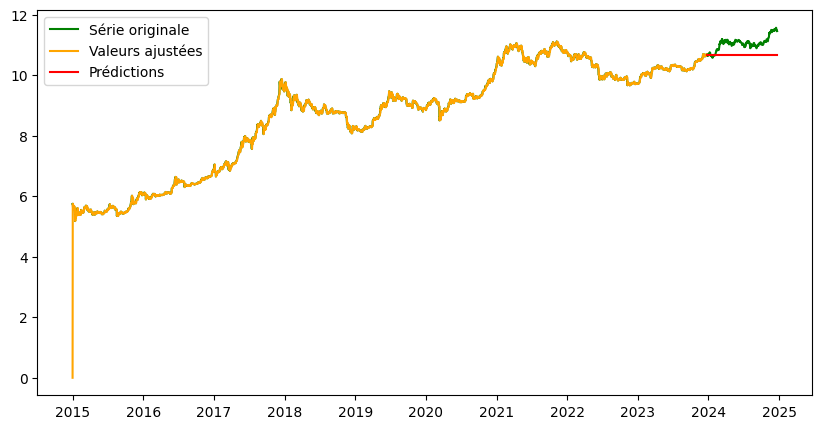

In [217]:
plt.figure(figsize=(10, 5))
plt.plot(df_log['close'], label='Série originale', color= 'green')
plt.plot(model_fit.fittedvalues, label='Valeurs ajustées', color='orange')
plt.plot(test_data.index, forecast, label='Prédictions', color='red')
plt.legend()
plt.show()

## Calculer l'erreur (MSE)

In [218]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(test_data, forecast)
print(f'MSE : {mse:.2f}')

MSE : 0.18


### Interprétation du MSE :
- Le MSE mesure l'erreur moyenne au carré entre les valeurs réelles et les valeurs prédites.
- Un MSE faible indique que les écarts entre les prédictions et les observations réelles sont petits.
- Dans notre cas, un MSE de 0.18 signifie que, en moyenne, les erreurs quadratiques sont très proches de zéro, ce qui est un signe positif pour la performance du modèle.

### Calculer le MAPE

In [219]:
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mape = mean_absolute_percentage_error(test_data, forecast)
print(f'MAPE : {mape:.2f}%')

MAPE : 3.36%


### Interprétation du MAPE :
- Un MAPE de 3.36 % signifie que, en moyenne, les prédictions du modèle diffèrent des valeurs réelles de seulement 3.36 %.
- Cela suggère que le modèle est bien ajusté aux données et que les erreurs sont très faibles.

---
---

# Les Métriques d’Évaluation en Machine Learning

# 1. Coefficient de Détermination (R²)
## Définition :

Le coefficient de détermination ( R² ) mesure la proportion de la variance des données réelles expliquée par le modèle.

## Formule :
$
R² = 1 - \frac{\sum{(y_i - \hat{y}_i)^2}}{\sum{(y_i - \bar{y})^2}}
$
- $ y_i $ : Valeurs réelles.  
- $ \hat{y}_i $ : Valeurs prédites.  
- $ \bar{y} $ : Moyenne des valeurs réelles.  

## Interprétation :
Représente la proportion de la variance expliquée par le modèle.
- $ R² \in [0, 1] $ (peut être négatif si le modèle est pire qu'une prédiction constante).  
  - **1** : Modèle parfait.  
  - **0** : Le modèle est aussi bon que la moyenne.  
  - **< 0** : Le modèle est pire qu'une prédiction basée sur la moyenne.  


## Avantages :
- Intuitif pour mesurer la qualité de l’ajustement.  
- Bonne mesure globale de performance.


## Inconvénients :
- Insensible aux biais systématiques.  
- Peut être trompeur si utilisé seul.


---

# 2. Mean Squared Error (MSE)
## Définition :

Le MSE calcule la moyenne des carrés des erreurs entre les prédictions et les valeurs réelles.

## Formule :
$
\text{MSE} = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2
$
- $ y_i $: Valeurs réelles.  
- $ \hat{y}_i $: Valeurs prédites.  
- $ n$ : Nombre de données.  

La MSE représente la moyenne des carrés des erreurs.

## Interprétation :
- Pénalise fortement les grandes erreurs (à cause de l'élévation au carré).  
- Plus le MSE est faible, meilleur est le modèle.

## Avantages :
- Sensible aux grandes erreurs, ce qui est utile pour détecter des anomalies.  
- Mathématiquement pratique (facilement dérivable pour optimiser).

## Inconvénients :
- Sensibilité excessive aux grandes erreurs.  
- Peu interprétable (n'est pas dans la même unité que les données).


---

# 3. Mean Absolute Error (MAE)
## Définition :

Le MAE calcule la moyenne des erreurs absolues entre les prédictions et les valeurs réelles.

## Formule :
$
\text{MAE} = \frac{1}{n} \sum_{i=1}^{n} |y_i - \hat{y}_i|
$
- $ y_i $ : Valeurs réelles.  
- $ \hat{y}_i $ : Valeurs prédites.  
- $ n $ : Nombre de données.  

La MAE représente la moyenne des erreurs absolues.

## Interprétation :
Indique l’erreur moyenne absolue entre les prédictions et les observations.  

## Avantages :
- Facile à interpréter (dans la même unité que les données).  
- Moins sensible aux grandes erreurs.  

## Inconvénients :
- Ne différencie pas les petites et grandes erreurs de manière significative.  
- Moins utile si les grandes erreurs doivent être pénalisées.


---

# 4. Mean Absolute Percentage Error (MAPE)
## Définition :

Le MAPE mesure l’erreur moyenne absolue en pourcentage des valeurs réelles.

## Formule :
$
\text{MAPE} = \frac{1}{n} \sum_{i=1}^{n} \left|\frac{y_i - \hat{y}_i}{y_i}\right| \times 100
$
- $ y_i $: Valeurs réelles.  
- $ \hat{y}_i $: Valeurs prédites.  
- $ n$ : Nombre de données.  

La MAPE mesure l’erreur moyenne absolue en pourcentage des valeurs réelles.

## Interprétation :
- Mesure l’erreur moyenne absolue en pourcentage des valeurs réelles.  
- Utile pour comparer des modèles sur des séries avec des échelles différentes.

## Avantages :
- Indépendant des unités.  
- Intuitif pour exprimer les erreurs en pourcentage.

## Inconvénients :
- Ne fonctionne pas si $ y_i = 0 $.  
- Biaisé pour les petites valeurs de $ y_i $.


---

# 5. Root Mean Squared Error (RMSE)
## Définition :

Le RMSE est la racine carrée du MSE, ce qui ramène l’erreur à la même échelle que les données.

## Formule :
$
\text{RMSE} = \sqrt{\frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2}
$
- $ y_i $: Valeurs réelles.  
- $ \hat{y}_i $: Valeurs prédites.  
- $ n $: Nombre de données.  

La RMSE est la racine carrée du MSE, ramenant l'erreur à l'échelle des données.

## Interprétation :
- La RMSE mesure l'écart-type des résidus, c'est-à-dire la racine carrée du MSE, ce qui permet de revenir à l'échelle des données.

## Avantages :
- Facilement interprétable (dans la même unité que les données).  
- Pénalise les grandes erreurs de manière modérée.

## Inconvénients :
- Comme le MSE, il est sensible aux grandes erreurs.


---

# Résumé Comparatif des Métriques

| **Métrique** | **Aspect Mathématique** | **Avantages** | **Inconvénients** |
|--------------|-------------------------|---------------|-------------------|
| **R²**       | Variance expliquée       | Facile à interpréter globalement | Insensible aux biais, limité en cas de non-linéarité |
| **MSE**      | Carré des erreurs        | Pénalise les grandes erreurs, utile en optimisation | Moins interprétable, sensible aux outliers |
| **MAE**      | Moyenne des erreurs absolues | Interprétable, robuste aux outliers | Moins sensible aux grandes erreurs |
| **MAPE**     | Erreur relative (%)      | Indépendant des unités, intuitif | Impossible à utiliser si \( y_i = 0 \) |
| **RMSE**     | Racine du MSE            | Combinaison de sensibilité et d'interprétabilité | Sensible aux outliers |


---

# Choix de la Métrique

- **R²** : Évaluation globale de l'ajustement du modèle. Utile pour obtenir une vue d'ensemble de la capacité du modèle à expliquer la variance des données.
  
- **MSE** : À privilégier si les grandes erreurs doivent être fortement pénalisées, car cette métrique met l'accent sur les erreurs importantes (en raison du carré).

- **MAE** : À utiliser lorsque les grandes erreurs ne sont pas critiques. C’est une métrique robuste aux erreurs extrêmes et facile à interpréter, mais elle ne différencie pas les erreurs petites et grandes de manière significative.

- **MAPE** : Idéale lorsque les échelles ou unités des données varient, ou pour exprimer des erreurs en pourcentage. Elle permet de comparer des modèles sur des données de différentes échelles.

- **RMSE** : Un bon compromis entre sensibilité aux grandes erreurs et interprétabilité, en ramenant l'erreur à l'échelle des données. Utile lorsque l'on veut un compromis entre pénalisation des erreurs et lisibilité de l'échelle.

Chaque métrique est utile dans des contextes différents. Le choix de la métrique dépend de la nature des données, des objectifs du projet et des contraintes spécifiques.
